# Dimensionality Reduction with PCA

In this notebook, I will be applying some of the dimensionality reduction algorithms. The aim of this task is to showcase my ability to apply machine learning algorithms to well-specified tasks and to evaluate the performance of these algorithms and to use this evaluation to improve performance.

In the following tasks, we will be working with wine quality dataset.

The provided data, contains the full dataset in which each row has 12 features. You are interested in using this dataset to predict the quality of the wine from the other variables using regression and in the effect that reducing the dimensionality 
of given dataset will have on the performance of your regression algorithm.

The objective of this notebook:-

Choose a regression algorithm of my choice. 

Design and implement a methodology to select an appropriate reduction method and a dimensionality to reduce the dataset to. 

Compare the performance of my regression algorithm on the full dataset and my chosen reduced dataset.

Based on these results, comment on whether I believe dimensionality reduction was a useful technique for solving this regression problem.

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [202]:
data=pd.read_csv("winequality-red-full.csv")
print("|| Data:"+str(data.shape)+"||")
data

|| Data:(1599, 12)||


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [203]:
#Checking for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [204]:
y= data['quality']
len(y)
len(data)
x= data.drop(columns="quality")
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [220]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Dimensionality/feature reduction

In [205]:
#Applying PCA on whole data 
pca= PCA(n_components=11)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [206]:
#Displaying explained variance ratio

explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.46079514e-01, 4.83483474e-02, 2.59599087e-03, 1.52288677e-03,
       1.04910404e-03, 3.34987986e-04, 3.10082440e-05, 1.93440109e-05,
       9.43889374e-06, 8.17881393e-06, 1.19899823e-06])

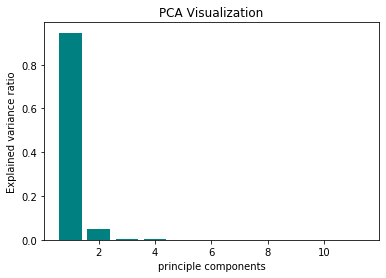

In [207]:
#Visualization of explained variance ratio

%matplotlib inline
plt.bar(range(1,12), pca.explained_variance_ratio_, color='teal')
plt.title("PCA Visualization")
plt.xlabel('principle components')
plt.ylabel('Explained variance ratio')
plt.show()

In [208]:
# Split the dataset for training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [209]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [210]:
# Standardizing data

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# # Regression algorithm methodology

In [211]:
# Logistic Regression model on full dataset

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)                #Creating model
LR.fit(X_train_std, y_train)                           #Fitting training data into the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
#Predicting model results from such data that haven't gone through dimensionality reduction

y_pred_LR=LR.predict(X_test_std)

In [213]:
# Model Evaluating with sklearn accuracy score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_pred_LR,y_test))
print(accuracy_score(y_pred_LR,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.10      1.00      0.18         1
           5       0.75      0.63      0.69       155
           6       0.58      0.54      0.56       141
           7       0.21      0.39      0.28        23
           8       0.00      0.00      0.00         0

    accuracy                           0.57       320
   macro avg       0.27      0.43      0.28       320
weighted avg       0.63      0.57      0.60       320

0.575


In [214]:
#Reducing dataset features from 11 to 3 and applying PCA with 3 components.

pca= PCA(n_components=3)
pca_train=pca.fit_transform(X_train_std)  # Fitting and transforming at the same instant to remove model inaccuracy
pca_test=pca.transform(X_test_std)    # testing


In [215]:
#Displaying explained variance ratio

explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.2801769 , 0.17563995, 0.13957636])

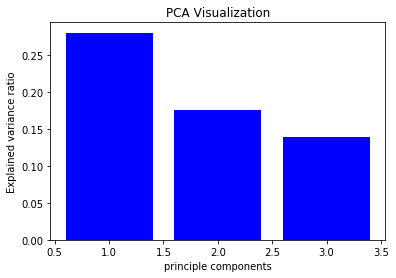

In [216]:
#Visualization of variance ratio

%matplotlib inline
plt.bar(range(1,4), pca.explained_variance_ratio_, color='blue')
plt.title("PCA Visualization")
plt.xlabel('principle components')
plt.ylabel('Explained variance ratio')
plt.show()

In [217]:
# Logistic Regression model on dimensions reduced dataset

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(pca_train,y_train) # Fitting the training set into model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
#Predicting model results from dimension reduced dataset

y_pred_LR=LR.predict(pca_test)

In [219]:
# Model Evaluation

print("Model accuracy score of dimension reduced dataset:", LR.score(pca_test,y_test))

Model accuracy score of dimension reduced dataset: 0.540625


Inclusion, by comparining two results it can be seen dimensionality reduction haven't significantly improved or deteriorated base model as well as dimension reduced dataset model, so reducing features of the data did not had any great impact on result generated by logistic regression model,it shows the data have less postive correlation within components.
Model accuracy score has reduced for dimension reduced dataset compared to base model.